# Projeto 2 - NLP
-----
Nome: Flávio Quirino

In [7]:
from Utils import *

In [8]:
df_train = pd.read_csv('./Dados/train/Train3Classes.csv')
df_sub = pd.read_csv('./Dados/subm/Subm3Classes.csv')
display(df_train.head(), df_sub.head())

,id,tweet_text,tweet_date,sentiment,query_used
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:)


,id,tweet_text,tweet_date,query_used
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:)
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:)
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:)
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:)


## **Análise de consistência dos dados** // **Análise exploratória**

In [9]:
# Verificando informaçoes sobre as colunas
df_train.info(), df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   tweet_text  5000 non-null   object
 2   tweet_date  5000 non-null   object
 3   query_used  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


(None, None)

In [10]:
# Verificando se há dados duplicados
df_train.duplicated().sum(), df_sub.duplicated().sum()

(0, 0)

In [11]:
# Verificando se consta algum valor da base de treino na base de submissão
id_sub_treino = [id_cliente for id_cliente in df_train["id"] if id_cliente in df_sub["id"]]

# Filtrando a partir da lista de ID´s
df_train.loc[id_sub_treino,:]

,id,tweet_text,tweet_date,sentiment,query_used


In [12]:
# Verificação as classes de sentimento, onde O = Negativo, 1 = Positivo, 2 = Neutro
df_train['sentiment'].value_counts(), df_train['sentiment'].value_counts(True)

(0    31696
 1    31678
 2    31626
 Name: sentiment, dtype: int64,
 0    0.333642
 1    0.333453
 2    0.332905
 Name: sentiment, dtype: float64)

## **Pré-processamento e transformações**

In [13]:
# Criando a lista de stopwords
stopwords = stopwords.words('portuguese')

In [14]:
# Abaixo, vamos retirar os acentos das stopwords
stopwords_sem_acentos = []
for elemento in stopwords:
    elemento_sem_acento = unidecode(elemento)
    stopwords_sem_acentos.append(elemento_sem_acento)

# Incluindo stopwords bastante utilizadas
stopword_mais_comuns = ["vc", "pra", "td", "aqui", "to", "ta", "q", "vai", "ai", "k",
                        "hj", "pt", "ia", "gt", "gte", "tava", "p", "la", "vao", "tb",
                        "ti", "vou", "ne", "tao", "foo", "ir", "dm","oi", "c", "ok",
                        "deu", "dar", "lt", "d", "mt", "la", "eh"]
stopwords_sem_acentos = stopwords_sem_acentos + stopword_mais_comuns

In [15]:
# Removendo colunas id e tweet_date
df_train_reduzida = df_train.drop(columns = ["id", "tweet_date"])
df_sub_reduzida = df_sub.drop(columns = ["id", "tweet_date"])

In [16]:
# Aplicando a função de pré-processamento nos datasets.
df_train_reduzida["text_clean"] = df_train_reduzida["tweet_text"].apply(lambda x: pre_processamento(x, stopwords = stopwords_sem_acentos))
df_train_reduzida["text_joined"] = df_train_reduzida["text_clean"].apply(lambda x: ' '.join(x))

df_sub_reduzida["text_clean"] = df_sub_reduzida["tweet_text"].apply(lambda x: pre_processamento(x, stopwords = stopwords_sem_acentos))
df_sub_reduzida["text_joined"] = df_sub_reduzida["text_clean"].apply(lambda x: ' '.join(x))

### **Visualização dos datasets pré-processados**

In [17]:
display(df_train_reduzida, df_sub_reduzida)

,tweet_text,sentiment,query_used,text_clean,text_joined
0,Rio elege maior bancada policial de sua histór...,2,folha,"[rio, elege, maior, bancada, policial, historia]",rio elege maior bancada policial historia
1,fiquei tão triste quando eu vi o preço da câme...,0,:(,"[fiquei, triste, vi, preco, camera]",fiquei triste vi preco camera
2,"Para Theresa May, seu plano para o Brexit é a ...",2,exame,"[theresa, may, plano, brexit, unica, opcao]",theresa may plano brexit unica opcao
3,caralho eu quero proteger a danielly em um pot...,0,:(,"[caralho, quero, proteger, danielly, pote, tad...",caralho quero proteger danielly pote tadinhaa
4,@SiCaetano_ viva o caos :),1,:),"[viva, caos]",viva caos
...,...,...,...,...,...
94995,Cuba e defensor de direitos humanos se unem co...,2,jornaloglobo,"[cuba, defensor, direitos, humanos, unem, cont...",cuba defensor direitos humanos unem contra che...
94996,#Oportunidade ➡️ Venha fazer parte da nossa eq...,2,#oportunidade,"[oportunidade, venha, fazer, parte, equipe, va...",oportunidade venha fazer parte equipe vagas ab...
94997,@96syoo EU SEI 😭😭 é por isso que significa mui...,0,:(,"[sei, significa, feliz, demais, amo, ver, deix...",sei significa feliz demais amo ver deixa bande...
94998,@louistsexhes N te conheço mas posta :D,1,:),"[n, conheco, posta]",n conheco posta


,tweet_text,query_used,text_clean,text_joined
0,Apartamento Vila Mariana Praça Monteiro dos Sa...,:),"[apartamento, vila, mariana, praca, monteiro, ...",apartamento vila mariana praca monteiro santos...
1,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,:),"[quero, x, scout, dizem, dou, muita, bala, cag...",quero x scout dizem dou muita bala cagada
2,mais uma analógica no correio à minha espera :...,:),"[analogica, correio, espera, falta, receber, d...",analogica correio espera falta receber duas le...
3,"Em festa de posse como presidente do STF, Toff...",folha,"[festa, posse, presidente, stf, toffoli, canta...",festa posse presidente stf toffoli canta legia...
4,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,:),"[flavia, tuiter]",flavia tuiter
...,...,...,...,...
4995,"Não é nada demais , apenas a verdade :) — Oh.....",:),"[nada, demais, apenas, verdade, oh, pronto, ob...",nada demais apenas verdade oh pronto obrigada
4996,Veja o que é #FATO ou #FAKE na entrevista de A...,#fato,"[veja, fato, fake, entrevista, anthony, garoti...",veja fato fake entrevista anthony garotinho rjtv
4997,"@nattvieiira de quem???? queria ver, eu sai po...",:(,"[queria, ver, sai, causa, lucas]",queria ver sai causa lucas
4998,ASSASSIN'S CREED ORIGINS: ENFRENTANDO OS IRMÃO...,:),"[assassin, s, creed, origins, enfrentando, irm...",assassin s creed origins enfrentando irmaos ze...


#### Wordcloud para sentimentos POSITIVOS

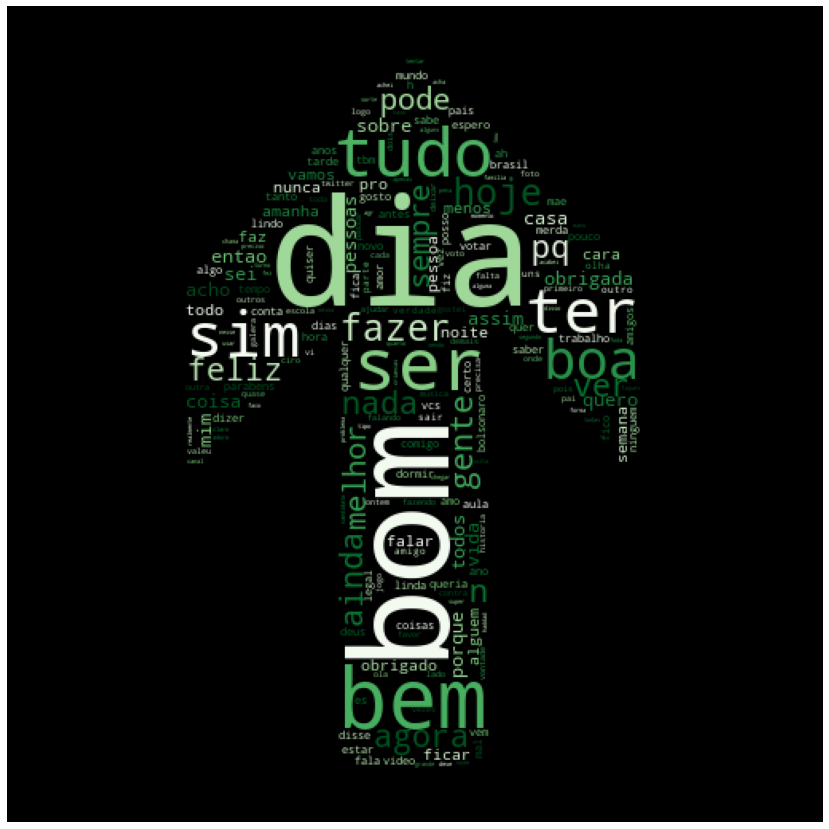

In [18]:
filtro_pos = (df_train_reduzida["sentiment"] == 1)

# Máscara para usar a imagem de nuvem do Twitter
mask = np.array(Image.open("icon_up.png"))

# Criando a wordcloud
wordcloud = (WordCloud(
                        width=3000,
                        height=2000,
                        random_state=1,
                        colormap="Greens",
                        collocations=False,
                        stopwords=stopwords_sem_acentos,
                        mask = mask
                    ).generate_from_frequencies(wc_df(df_train_reduzida, column="text_clean", filter=True, filter_type=filtro_pos))
    )

# Plotando a wordcloud
plot_cloud(wordcloud)

#### Wordcloud para sentimentos NEUTROS

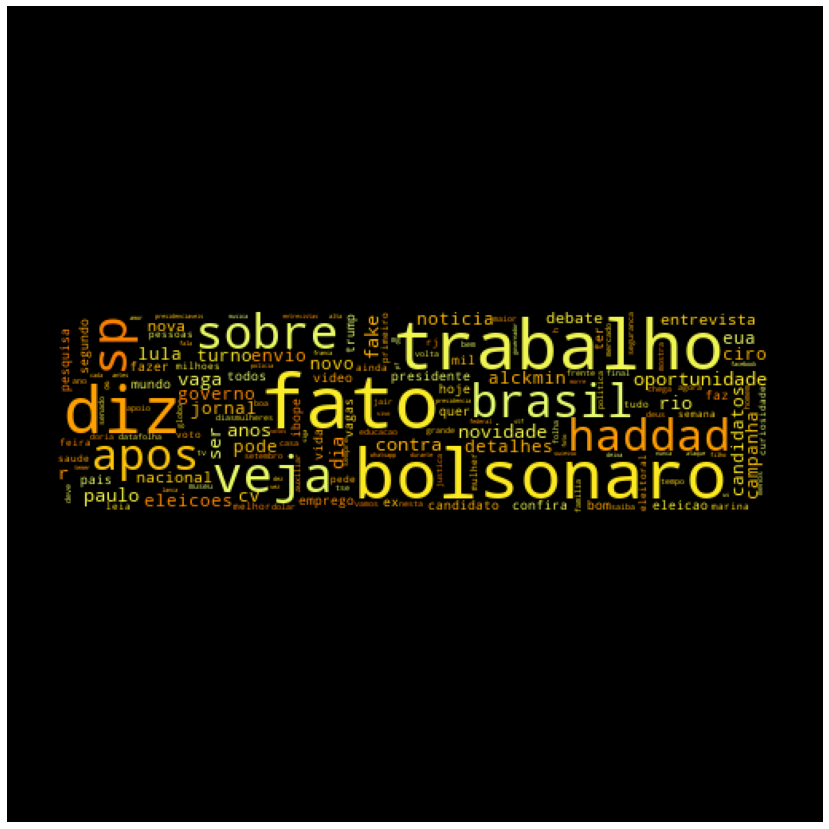

In [19]:
filtro_neutro = (df_train_reduzida["sentiment"] == 2)

# Máscara para usar a imagem de nuvem do Twitter
mask = np.array(Image.open("icon_neutral.png"))

# Criando a wordcloud
wordcloud = (WordCloud(
                        width=3000,
                        height=2000,
                        random_state=1,
                        background_color="black",
                        colormap="Wistia_r",
                        collocations=False,
                        stopwords=stopwords_sem_acentos,
                        mask = mask
                    ).generate_from_frequencies(wc_df(df_train_reduzida, column="text_clean", filter=True, filter_type=filtro_neutro))
    )

# Plotando a wordcloud
plot_cloud(wordcloud)

#### Wordcloud para sentimentos NEGATIVOS

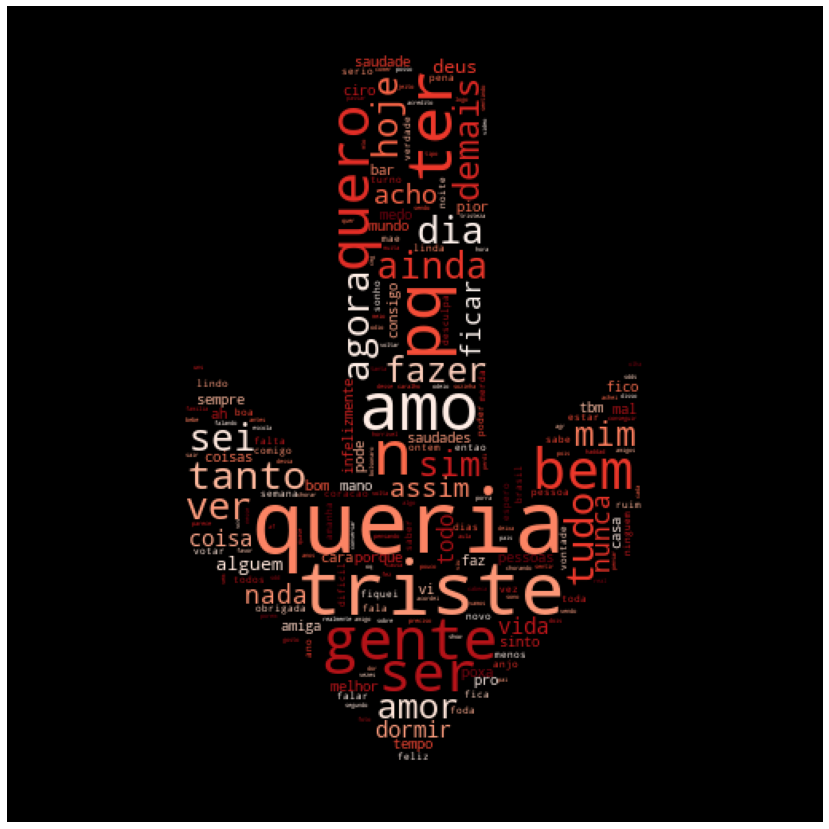

In [20]:
filtro_neg = (df_train_reduzida["sentiment"] == 0)

# Máscara para usar a imagem de nuvem do Twitter
mask = np.array(Image.open("icon_down.png"))

# Criando a wordcloud
wordcloud = (WordCloud(
                        width=3000,
                        height=2000,
                        random_state=2,
                        colormap="Reds_r",
                        collocations=False,
                        stopwords=stopwords_sem_acentos,
                        mask = mask
                    ).generate_from_frequencies(wc_df(df_train_reduzida, column="text_clean", filter=True, filter_type=filtro_neg))
    )

# Plotando a wordcloud
plot_cloud(wordcloud)

## **Treinamento do modelo**


Utilização dos Modelos de LogisticRegression, RandomForest e XGBClassifier

### Baseline

In [21]:
models = {  "Regressão Logística": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
        "XGBoost": XGBClassifier(random_state=42, eval_metric="logloss", n_jobs=-1)
        }

baseline = baseline_transform(models, X=df_train_reduzida["text_joined"], y=df_train_reduzida["sentiment"], verbose=True)

Iniciando o loop de modelos
Fit do modelo Regressão Logística iniciado
Fit do modelo Regressão Logística finalizado
Fit do modelo Random Forest iniciado
Fit do modelo Random Forest finalizado
Fit do modelo XGBoost iniciado
Fit do modelo XGBoost finalizado


In [22]:
baseline

,Regressão Logística,Random Forest,XGBoost
recall_test,0.797853,0.754495,0.727053
recall_train,0.910461,0.986150,0.745997
precision_test,0.798748,0.759708,0.755918
precision_train,0.910452,0.986232,0.775328
f1_test,0.798083,0.753744,0.729893
f1_train,0.910420,0.986161,0.748810
accuracy_test,0.797853,0.754495,0.727053
accuracy_train,0.910461,0.986150,0.745997
roc_auc_test,0.925252,0.901157,0.890360
roc_auc_train,0.979662,0.998266,0.906143


Nosso objetivo é classificar o tweet corretamente, logo, focaremos na métrica de PRECISION porque vamos analisar amostra de tweets, ou seja, nosso objetivo é acertar o maior número de sentimentos corretos nas amostras.

Vale a pena ressaltar que os modelos Random Forest e Regressão Logística aprensentaram overfitting no treino.

O melhor modelo utilizando a métrica PRECISION foi o de Regressão Logísitca e por isso utilizaremos ele como modelo baseline para testar diferentes transformações de dados. Testaremos as seguintes técnicas:   

- Bag of words
- TF-IDF
- Word2Vec
- Doc2Vec

### Testando transformações

In [23]:
# Criando o X e o Y que usaremos nas transformações de bag of words e TF-IDF
X = df_train_reduzida["text_joined"].copy()
y = df_train_reduzida["sentiment"].copy()

# Treino para o bag of words e para o TF-IDF (passamos de treino e teste uma sentença)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Criando o X e o Y que usaremos nas transformações de word2vec e doc2vec
X_ = df_train_reduzida["text_clean"].copy()
y_ = df_train_reduzida["sentiment"].copy()

# Treino para doc2vec
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.3, random_state = 42)

# Fazendo as transformações em cada dataset de treino e teste a cada transformação

##### Bag of words #####
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
print("Bag of words criado")

###### TF-IDF #####
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfid = tfidf.transform(X_test)
print("TF-IDF criado")

###### Word2Vec skipgram #####
w2v_s = Word2Vec(sentences=X_train_, vector_size=500, min_count=5, workers=-1,sg=1)
X_train_w2v_sn_skip = train_test_word2vec(X_train_,model=w2v_s)
X_test_w2v_sn_skip = train_test_word2vec(X_test_,model=w2v_s)
print("Word2Vec skipgram criado")

##### Word2Vec cbow #####
w2v_c = Word2Vec(sentences=X_train_, vector_size=500, min_count=5, workers=-1,sg=0)
X_train_w2v_sn_cbow = train_test_word2vec(X_train_,model=w2v_c)
X_test_w2v_sn_cbow = train_test_word2vec(X_test_,model=w2v_c)
print("Word2Vec cbow criado")

##### Doc2vec #####
train_corpus = read_corpus_doc2vec(X_train_)
test_corpus = read_corpus_doc2vec(X_test_, tokens_only=True)
d2v = doc2vec.Doc2Vec(vector_size=500, min_count=2, epochs=20)
d2v.build_vocab(train_corpus)
d2v.train(train_corpus, total_examples=d2v.corpus_count, epochs=d2v.epochs)
X_train_d2v = train_test_doc2vec(X_train_,model=d2v)
X_test_d2v = train_test_doc2vec(X_test_,model=d2v)
print("Doc2vec criado")

Bag of words criado
TF-IDF criado
Word2Vec skipgram criado
Word2Vec cbow criado
Doc2vec criado


In [24]:
# Dicionário de transformadores com suas respectivas bases de treino e testes com as transformações aplicadas
transformers_train_test_sets = {"bag of words":{"X_train":X_train_cv,
                                                "X_test":X_test_cv,
                                                "y_train":y_train,
                                                "y_test":y_test},

                                        "TF-IDF":{"X_train":X_train_tfidf,
                                                "X_test":X_test_tfid,
                                                "y_train":y_train,
                                                "y_test":y_test},

                            "Word2Vec skipgram":{"X_train":X_train_w2v_sn_skip,
                                                "X_test":X_test_w2v_sn_skip,
                                                "y_train":y_train_,
                                                "y_test":y_test_},

                                "Word2Vec cbow":{"X_train":X_train_w2v_sn_cbow,
                                                "X_test":X_test_w2v_sn_cbow,
                                                "y_train":y_train_,
                                                "y_test":y_test_},
                                                
                                    "Doc2vec":{"X_train":X_train_d2v,
                                                "X_test":X_test_d2v,
                                                "y_train":y_train_,"y_test":y_test_}}

In [25]:
table = try_transformers(transformers_train_test_sets, LogisticRegression(max_iter=500, random_state=42))

BAG OF WORDS
Treinando bag of words
Treinamento com bag of words finalizado
Testando bag of words
Teste com bag of words finalizado
        
                ###############################################
                ############ Classification Report ############
                ###############################################
            
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      9559
           1       0.71      0.69      0.70      9555
           2       0.95      0.93      0.94      9386

    accuracy                           0.79     28500
   macro avg       0.79      0.79      0.79     28500
weighted avg       0.79      0.79      0.79     28500

************************************************** 

TF-IDF
Treinando TF-IDF
Treinamento com TF-IDF finalizado
Testando TF-IDF
Teste com TF-IDF finalizado
        
                ###############################################
                ############ Classification R

In [26]:
table

,bag of words,TF-IDF,Word2Vec skipgram,Word2Vec cbow,Doc2vec
recall_test,0.792316,0.797368,0.645228,0.645228,0.618877
recall_train,0.793323,0.798602,0.638496,0.638496,0.614060
precision_test,0.793393,0.796887,0.643973,0.643973,0.617605
precision_train,0.794803,0.799037,0.637257,0.637257,0.612695
f1_test,0.792624,0.796760,0.644320,0.644320,0.618089
f1_train,0.793821,0.798245,0.637619,0.637619,0.613150
accuracy_test,0.792316,0.797368,0.645228,0.645228,0.618877
accuracy_train,0.793323,0.798602,0.638496,0.638496,0.614060
roc_auc_test,0.921439,0.925232,0.824853,0.824853,0.802973
roc_auc_train,0.922382,0.926129,0.821888,0.821888,0.795782


## **Conclusões**

Através do Classification Report, podemos constatar que o tipo de transformação que mais traz resultado é o TF-IDF, visto que ele possui a precision da classe 0 (sentimentos negativos) maior, mesmo o modelo de LogisticRegression estando overfittado.   

Os sentimentos negativos podem trazer mais insights sobre pontos de melhoria, desta forma focamos na transformação que tem a maior precision para a classe 0.

In [27]:
tfid= TfidfVectorizer()
X_train_full = tfid.fit_transform(df_train_reduzida["text_joined"]) # treinamento com toda a base
X_test_full = tfid.transform(df_sub_reduzida["text_joined"]) # transformação na base de subsmissão

# Fit e gerando as predições
model = LogisticRegression(random_state=42, n_jobs=-1, solver="saga", multi_class="multinomial")
model.fit(X_train_full, df_train_reduzida["sentiment"])
predictions = model.predict(X_test_full)

#Gerando o arquivo cvs com as predições
#pd.DataFrame(index=df_sub["id"],data={"sentiment_predict":predictions}).to_csv("Flavio_Quirino_projeto_2_submissao.csv")